### Processing of both AUs and Compound Emotions

if we were to create a pipeline for both AUs and Compound Emotions, we would need to use this processing since some images are annotated with null values for the AU labels.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
working_dir = "../data/"
compound_df = pd.read_csv(working_dir+"compound_df_clean.csv")
au_df =  pd.read_csv(working_dir+"au_features_clean.csv")
print(au_df.shape)

(4549, 30)


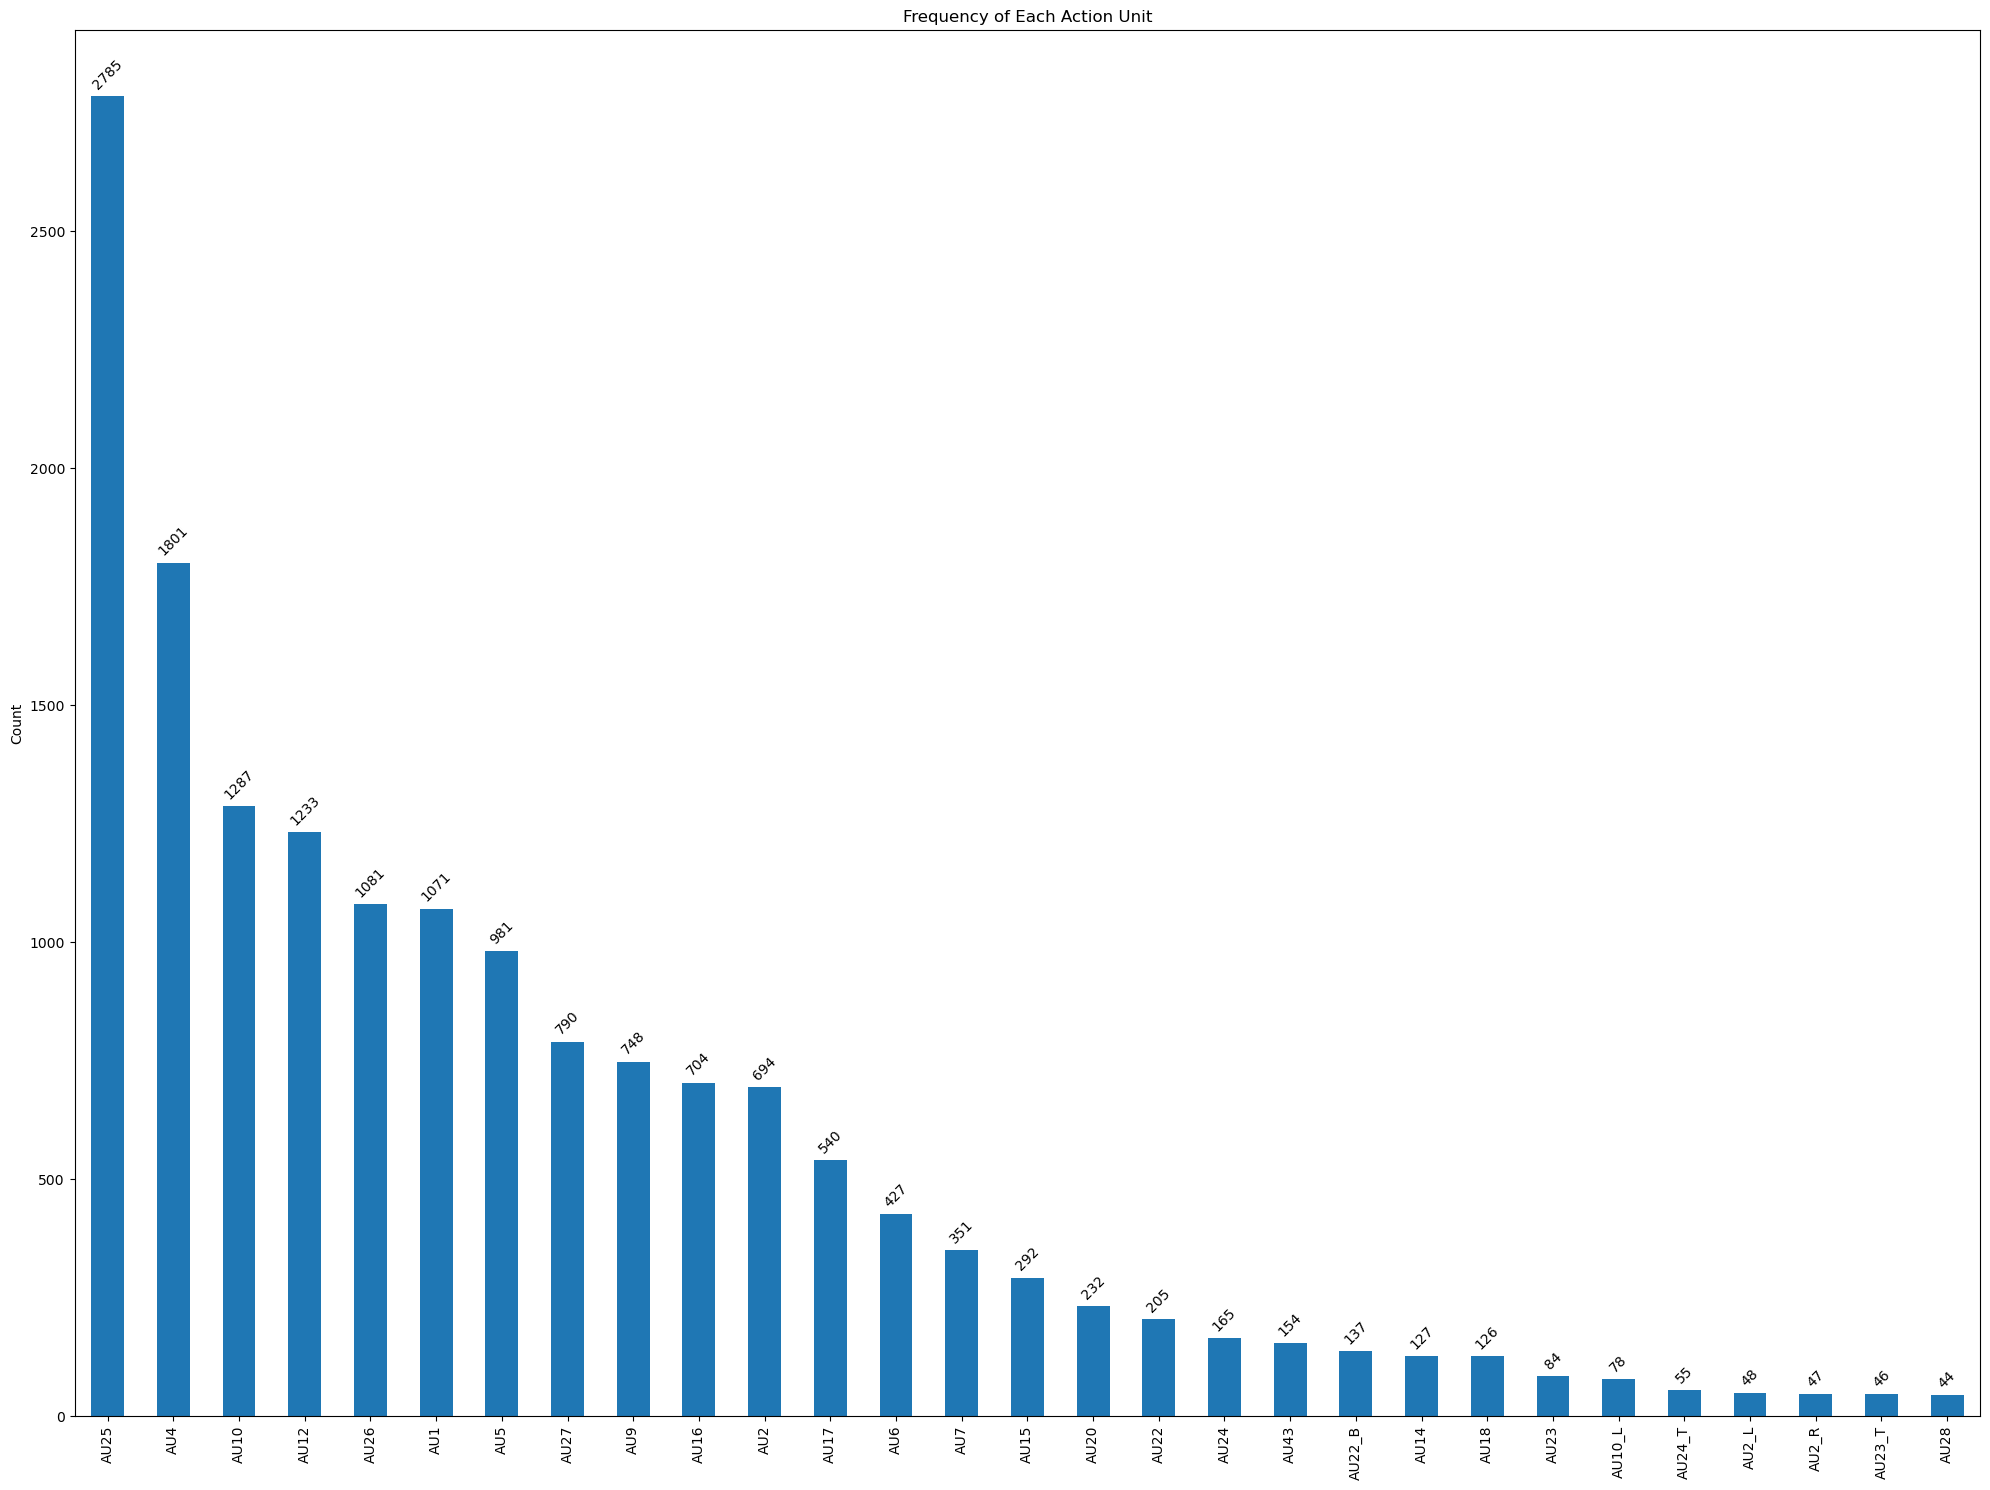

In [20]:
plt.figure(figsize=(20,15))
au_columns = [c for c in au_df.columns.drop("image")]
au_frequencies = au_df[au_columns].sum().sort_values(ascending=False)

ax = au_frequencies.plot(kind="bar")

ax.bar_label(ax.containers[0], padding=3, rotation=45)

plt.title("Frequency of Each Action Unit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

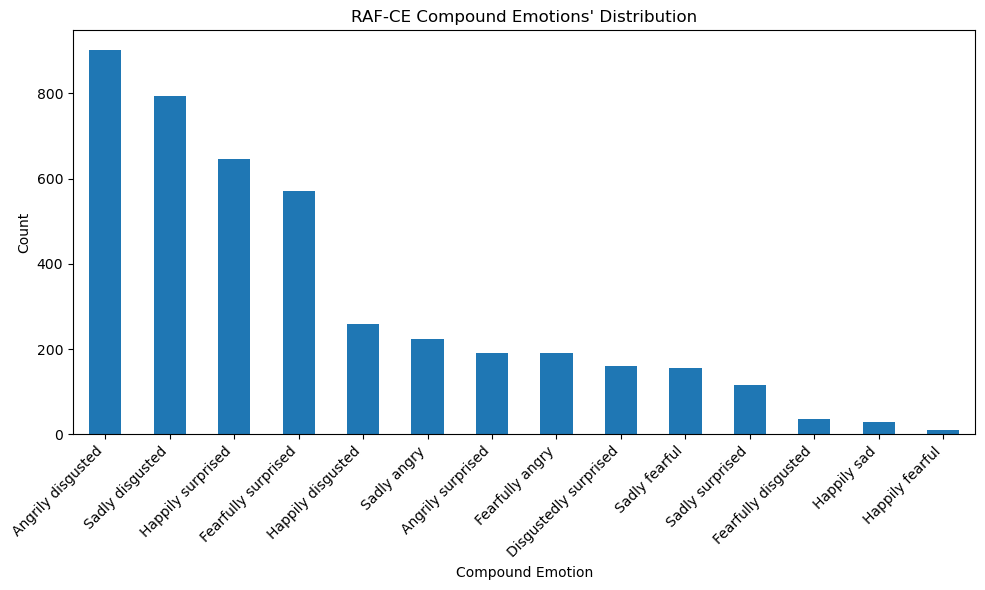

In [22]:

emotion_map = {
    0: 'Happily surprised',
    1: 'Happily disgusted',
    2: 'Sadly fearful',
    3: 'Sadly angry',
    4: 'Sadly surprised',
    5: 'Sadly disgusted',
    6: 'Fearfully angry',
    7: 'Fearfully surprised',
    8: 'Fearfully disgusted',
    9: 'Angrily surprised',
    10: 'Angrily disgusted',
    11: 'Disgustedly surprised',
    12: 'Happily fearful',
    13: 'Happily sad'
}
counts = compound_df["compound_emotion"].value_counts()
counts.index = counts.index.map(emotion_map)
counts.plot(kind="bar", figsize=(10,6))
plt.title("RAF-CE Compound Emotions' Distribution")
plt.xlabel("Compound Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

In [23]:
print(counts)

compound_emotion
Angrily disgusted        903
Sadly disgusted          795
Happily surprised        646
Fearfully surprised      572
Happily disgusted        259
Sadly angry              225
Angrily surprised        192
Fearfully angry          192
Disgustedly surprised    160
Sadly fearful            156
Sadly surprised          117
Fearfully disgusted       35
Happily sad               28
Happily fearful           11
Name: count, dtype: int64


Huge class imbalance 

### Processing of the compound emotions 
this section will be dedicated to the processing of the compound emotions only.

In [25]:
compound_emotion_labels = pd.read_csv(
    "../data/label.txt",
    sep=r"\s+",
    header=None,
    names=["image","compound_emotion"]
)
compound_emotion_labels.head()

,image,compound_emotion
0,0001.jpg,5
1,0002.jpg,5
2,0003.jpg,10
3,0004.jpg,3
4,0005.jpg,10


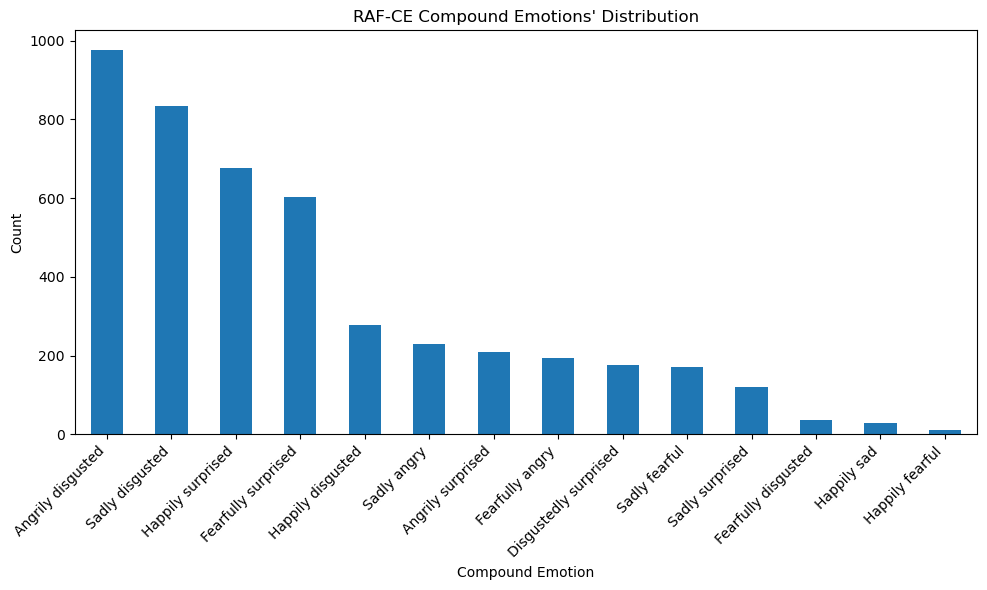

In [28]:

emotion_map = {
    0: 'Happily surprised',
    1: 'Happily disgusted',
    2: 'Sadly fearful',
    3: 'Sadly angry',
    4: 'Sadly surprised',
    5: 'Sadly disgusted',
    6: 'Fearfully angry',
    7: 'Fearfully surprised',
    8: 'Fearfully disgusted',
    9: 'Angrily surprised',
    10: 'Angrily disgusted',
    11: 'Disgustedly surprised',
    12: 'Happily fearful',
    13: 'Happily sad'
}
counts = compound_emotion_labels["compound_emotion"].value_counts()
counts.index = counts.index.map(emotion_map)
counts.plot(kind="bar", figsize=(10,6))
plt.title("RAF-CE Compound Emotions' Distribution")
plt.xlabel("Compound Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

In [29]:
print(counts)

compound_emotion
Angrily disgusted        977
Sadly disgusted          835
Happily surprised        676
Fearfully surprised      603
Happily disgusted        279
Sadly angry              230
Angrily surprised        210
Fearfully angry          195
Disgustedly surprised    177
Sadly fearful            171
Sadly surprised          120
Fearfully disgusted       36
Happily sad               29
Happily fearful           11
Name: count, dtype: int64
